# Inhomogene differensialligningssystemer

La oss gå tilbake til et differensialligningssystem vi har sett på tidligere. Hvis vi husker beskrivelsen kan vi gå direkte til den matematiske formuleringen.

## [Tømming av sammenkoblede vanntanker](https://www.math.ttu.edu/~klong/ODESystems.pdf)

Vi ser på to vanntanker (åpne for luft på toppen) som er koblet sammen nær bunnen via et rør. I tillegg har hver tank også et dreneringsrør.
Vann strømmer mellom tankene samt ut gjennom avløpene. En skjematisk tegning av oppsettet er vist på figuren under.

![koblede kar](https://github.com/mbr085/V25MAT102/blob/main/notebooks/uke6/koblede_kar.png?raw=1)
[Av Katharine Long](https://www.math.ttu.edu/~klong/)

Hydrostatikk forteller oss at trykket på bunnen av en vannsøyle med høyde $h$ er $p = \rho gh$, der $\rho$ er vanntettheten og $g$ er gravitasjonsakselerasjonen. Du har kanskje sett Hagen-Poiseuille-loven for laminær strømning gjennom et sylindrisk rør: Den volumetriske strømningstakten $Q$ (volum væske per tidsenhet) bestemmes av trykkforskjellen $\Delta p$ mellom rørenes ender, rørenes geometri, og væskens viskositet:

$$
Q = \frac{\pi a^4 \Delta p}{8 \mu L}
$$

hvor a er rørradius, L er rørlengde og μ er den dynamiske viskositeten til væsken. Deretter er strømningstakten fra tank 1 til tank 2:

$$
Q_{12} = \frac{\pi a^4 \rho g}{8 \mu L} (h_1 - h_2)
$$

Strømningstaktene i avløpsrørene er:
$$
Q_{10} = \frac{\pi a^4 \rho g}{8 \mu L} h_1
$$

og

$$
Q_{20} = \frac{\pi a^4 \rho g}{8 \mu L} h_2
$$

Volumet av vann i tank 1 endres med takten:

$$
\frac{dV_1}{dt} = -Q_{12} - Q_{10}
$$

og i tank 2 endres volumet med takten:
$$
\frac{dV_2}{dt} = Q_{12} - Q_{20}
$$

Ved å merke oss at vannvolumet $V_i$ er søylehøyden $h_i$ ganget med arealet $A$ av tankens horisontale tverrsnitt, finner vi:

$$
\frac{dh_1}{dt} = \frac{\pi a^4 \rho g}{8 \mu L A} (-2 h_1 + h_2)
$$

og

$$
\frac{dh_2}{dt} = \frac{\pi a^4 \rho g}{8 \mu L A} (h_1 - 2 h_2)
$$

Størrelsen $ \frac{1}{\tau} \equiv \frac{\pi a^4 \rho g}{8 \mu L A} $ har dimensjonen tid$^{-1}$. Ved å gjøre transformasjonen til en dimensjonsløs tidsvariabel $\hat{t} = \frac{t}{\tau} $, $d\hat{t} = \tau^{-1} dt$, og deretter ignorere “hattene” på $\hat{t}$, får vi likningene:

$$
h_1' = -2h_1 + h_2
$$

og

$$
h_2' = h_1 - 2h_2
$$

## Matematisk reformulering

La oss skrive $x_0 = h_1(t_0)$ for høyden i den første tanken til tiden $t_0$ og
$y_0 = h_2(t_0)$ for høyden i den andre tanken til tiden $t_0$.

Skriver vi videre $x(t) = h_1(t)$ og $y(t) = h_2(t)$ er vi kommet frem til systemet
$$x'(t) = -2x(t) + y(t) = f(x, x(t), y(t)), \quad \text{med} \quad x(t_0) = x_0$$
og
$$y'(t) = x(t) - 2y(t) = g(x, x(t), y(t)), \quad \text{med} \quad y(t_0) = y_0$$
Dette systemet har vi løst med Eulers metode. Vi vil nå finne eksakte løsninger for dette systemet.

Skriver vi $\vec v(t) = \begin{bmatrix}x(t)\\y(t)\end{bmatrix}$ og $A = \begin{bmatrix}-2&1\\1&-2\end{bmatrix}$ kan vi skrive dette systemet som $\vec v'(t) = A \cdot \vec v(t)$ med startbetingelsen $\vec v(t_0) = \vec v_0$ for $\vec v_0 = \begin{bmatrix}x_0\\y_0\end{bmatrix}$.

## Oppgave

Finn en analytisk løsning til dette homogene lineære differensialligningssystemet. Du kan gjøre det i disse stegene:

1. Finn det karakteristiske polynomet $p(t) = \det(A - tI)$.
2. Finn røttene til det karakteristiske polynomet $p(t)$. Dette er egenverdiene $\lambda_1$ og $\lambda_2$ til systemet.
3. Finn egenvektorene hørende til $\lambda_1$ og $\lambda_2$. Det vil si vektorer $\vec w_1$ og $\vec w_2$ slik at $(A -\lambda_1 I) \vec w_1 = 0$ og $(A -\lambda_2 I) \vec w_2 = 0$. Disse kan finnes ved å løse lineære ligningssystemer.
4. Sjekk at for alle $x$ og $y$ er $\vec v(t) = xe^{\lambda_1 (t-t_0)} \vec w_1 + ye^{\lambda_2 (t-t_0)} \vec w_2$ en funksjon med $\vec v'(t) = A \cdot \vec v(t)$ og $\vec v(t_0) = x\vec w_1 + y \vec w_2$.
5. Finn $x$ og $y$ slik at $\vec v_0 = x\vec w_1 + y \vec w_2$.
6. Plot løsningen på intervallet $[0, 5]$ for $\vec v_0 = \begin{bmatrix}1.6\\0.3\end{bmatrix}$ og $t_0 = 0$.

### Plotting ved hjelp av python:

Vi har allerede plottet løsningen funnet med Eulers metode. Siden vi også har kodet analytisk løsning kan vi også plotte denne.

In [1]:
try:
    import python_linear_algebra
except:
    !pip install python_linear_algebra@git+https://github.com/mbr085/python_linear_algebra
    import python_linear_algebra


In [2]:
import numpy as np
from python_linear_algebra.matrix_reduction import skriv_ut_egenvektorer_og_multiplikasjon_med_matrise
from python_linear_algebra.matrix_reduction import skriv_ut_numpy_egenvektorer_og_multiplikasjon_med_matrise
from python_linear_algebra.matrix_reduction import finn_egenvektorer_og_egenverdier
from python_linear_algebra.matrix_reduction import gauss_jordan
from python_linear_algebra.matrix_reduction import invers_matrise
from python_linear_algebra.diffligninger import løs_homogent_system_av_differensialligninger
import matplotlib.pyplot as plt

In [3]:
A = np.array([
    [-2, 1],
    [1, -2]
])
v0 = np.array([1.6, 0.3])
t = np.linspace(0, 5, 100)

In [4]:
v = løs_homogent_system_av_differensialligninger(overgangsmatrise=A, starttilstand=v0, tverdier=t)

Text(0, 0.5, 'høyde (meter)')

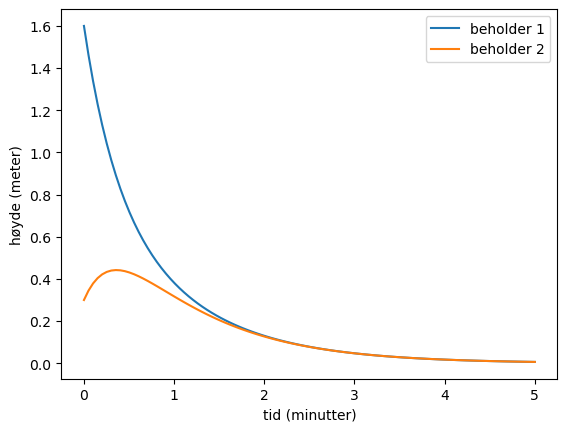

In [5]:
plt.plot(t, v[0], label='beholder 1')
plt.plot(t, v[1], label='beholder 2')
plt.legend()
plt.xlabel('tid (minutter)')
plt.ylabel('høyde (meter)')


# Inhomogene differensialligningssystem

Hvis vi nå tenker oss at det regner inn i tankene må vi endre litt på ligningene våre. La oss tenke oss at det ikke regner like mye inn i de to tankene. For eksempel fordi den ene tanken er delvis tildekket.

Ligningene
$$
h_1' = -2h_1 + h_2
$$

og

$$
h_2' = h_1 - 2h_2
$$

må da få lagt til ledd på høyresiden som forteller hvor mye det regner. For enkelthets skyld antar jeg at regnen ikke varierer med tiden slik at disse leddene er konstante. De nye ligningene blir da

$$
h_1' = -2h_1 + h_2 - a
$$

og

$$
h_2' = h_1 - 2h_2 - b
$$

for ikke-negative tall $a$ og $b$.

Skrevet på matriseform blir dette

$$\vec v'(t) = A \cdot \vec v(t) + \vec r$$

der

$$\vec r = \begin{bmatrix} -a \\ -b\end{bmatrix}$$

er en vektor som forteller hvor mye det regner inn i de to tankene.

For å løse dette finner vi først en vektor $\vec w$ slik at $A \cdot \vec w + \vec r = 0$. Siden dette er det samme som at

$$A \cdot \vec w = - \vec r$$

kan en slik $\vec w$ finnes ved å løse et lineært ligningssystem.

Den konstante vektorfunksjonen $\vec v(t) = \vec w$ oppfylder ligningen
$$\vec v'(t) = A \cdot \vec v(t) + \vec r$$
fordi $\vec v'(t) = 0$ og $A \cdot \vec v(t) + \vec r = A \cdot \vec w + \vec r = - \vec r + \vec r = 0$.

## Oppgave

La $\vec v_0 = \begin{bmatrix}1.6\\0.3\end{bmatrix}$ og $\vec r = \begin{bmatrix}-0.1\\-0.3\end{bmatrix}$.

Finn en analytisk løsning til det inhomogene lineære differensialligningssystemet $\vec v'(t) = A \cdot \vec v(t) + \vec r$ med $v(t_0) = v_0$. Du kan gjøre det i disse stegene som du allerede har gjort det fleste av:



1. Finn det karakteristiske polynomet $p(t) = \det(A - tI)$.
2. Finn røttene til det karakteristiske polynomet $p(t)$. Dette er egenverdiene $\lambda_1$ og $\lambda_2$ til systemet.
3. Finn egenvektorene hørende til $\lambda_1$ og $\lambda_2$. Det vil si vektorer $\vec w_1$ og $\vec w_2$ slik at $(A -\lambda_1 I) \vec w_1 = 0$ og $(A -\lambda_2 I) \vec w_2 = 0$. Disse kan finnes ved å løse lineære ligningssystemer.
4. Finn en vektor $\vec w$ slik at $A \cdot \vec w + \vec r = 0$.
5. Sjekk at for alle $x$ og $y$ er $\vec v(t) = \vec w + xe^{\lambda_1 (t-t_0)} \vec w_1 + ye^{\lambda_2 (t-t_0)} \vec w_2$ en funksjon med $\vec v'(t) = A \cdot \vec v(t) + \vec r$ og $\vec v(t_0) - \vec w = x\vec w_1 + y \vec w_2$.
6. Finn $x$ og $y$ slik at $\vec v_0 - \vec w = x\vec w_1 + y \vec w_2$.
7. Plot løsningen på intervallet $[0, 5]$ der du lar $t_0 = 0$.

### Plotting ved hjelp av python

In [6]:
from python_linear_algebra.matrix_reduction import partikulaer_losning

def løs_inhomogent_system_av_differensialligninger(overgangsmatrise, starttilstand, påtrykk, tverdier):
    '''
    Løser et homogent lineært system av differensialligninger analytisk

    Parametre:
        overgangsmatrise (np.ndarray): En kvadratisk Numpy-array med koeffisientene for systemet
        starttilstand (np.ndarray): En 1D Numpy-array av samme lengde som overgangsmatrise
        påtrykk (np.nparray): En 1D Numpy-array av samme lengde som overgangsmatrise
        tverdier (np.ndarray): En 1D Numpy-array med verdier av t der løsningen skal beregnes

    Retunerer:
        y (np.ndarray): Verdiene av løsningen til sistemet i de angitte tverdier
    '''
    påtrykk = np.array(påtrykk).reshape((påtrykk.size, 1))
    starttilstand = np.array(starttilstand).reshape((påtrykk.size, 1))
    ligevektsløsning = partikulaer_losning(overgangsmatrise, påtrykk)
    return løs_homogent_system_av_differensialligninger(
        overgangsmatrise, starttilstand - ligevektsløsning, tverdier) + ligevektsløsning


In [7]:
r = np.array([-0.1, -0.3])

In [8]:
v = løs_inhomogent_system_av_differensialligninger(overgangsmatrise=A, starttilstand=v0, påtrykk=r, tverdier=t)

Text(0, 0.5, 'høyde (meter)')

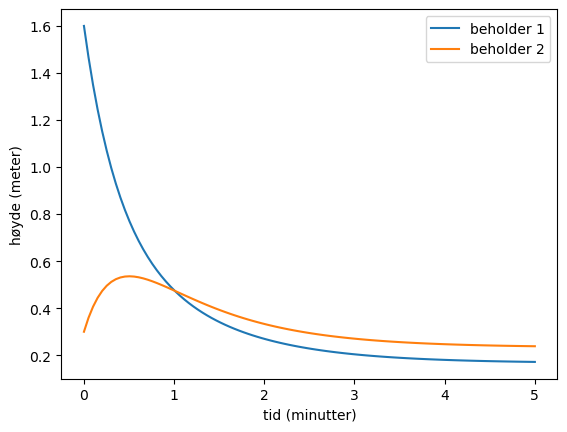

In [9]:
plt.plot(t, v[0], label='beholder 1')
plt.plot(t, v[1], label='beholder 2')
plt.legend()
plt.xlabel('tid (minutter)')
plt.ylabel('høyde (meter)')
